# Taller 4

Este proyecto consiste en crear una Serie de Tiempo empleando distintos modelos para el desarrollo de esta, con el proposito de predecir mensualmente la cantidad de feminicidios en Colombia. Se usaran las siguientes definiciones:



*   ARIMA: es un modelo estadístico que utiliza variaciones y regresiones de datos estadísticos con el fin de encontrar patrones para una predicción hacia el futuro. Se trata de un modelo dinámico de series temporales, es decir, las estimaciones futuras vienen explicadas por los datos del pasado y no por variables independientes.

*   Grafico de la Serie: es un modelo estadístico que utiliza variaciones y regresiones de datos estadísticos con el fin de encontrar patrones para una predicción hacia el futuro. Se trata de un modelo dinámico de series temporales, es decir, las estimaciones futuras vienen explicadas por los datos del pasado y no por variables independientes.

*    Autocorrelacion: se utiliza para describir la presencia o ausencia de correlación en los datos de las series temporales, indicando, si las observaciones pasadas influyen en las actuales.

      * La función de autocorrelación (ACF): 
          * Mide la correlación entre dos variables separadas por k periodos.
          * Mide el grado de asociación lineal que existe entre dos variables del mismo proceso estocástico.
      * La función de autocorrelación parcial (PACF)
          * Mide la correlación entre dos variables separadas por k periodos cuando no se considera la dependencia creada por los retardos intermedios existentes entre ambas.
          * Mide la autocorrelación que existe entre dos variables separadas k períodos descontando los posibles efectos debidos a variables intermedias.

*  Periodograma: está basado en una herramienta matemática denominada Transformada de Fourier, según la cual una serie, que cumpla determinados requisitos, puede descomponerse como suma de un número finito o infinito de frecuencias. Del mismo modo, a partir de la representación frecuencial puede recuperarse la serie original a través de la Transformada Inversa de Fourier.

Los datos seran tomados de la pagina web del Observatorio Feminicidios Colombia, donde se muestran con histogramas los datos desde Julio del 2017 hasta Diciembre del 2021 sobre feminicidios y transfeminicidio en Colombia. Estos datos seran pasados manualmente a un archivo en excel para trabajar con un (.xlsx).

URL de la base de datos: https://www.observatoriofeminicidioscolombia.org/index.php/reportes

## Serie de tiempo con los datos:

In [ ]:
# ¡ Paquetes !

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y Forecasting
# ==============================================================================
!pip install skforecast
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from scipy import stats
from joblib import dump, load
plt.style.use('ggplot')

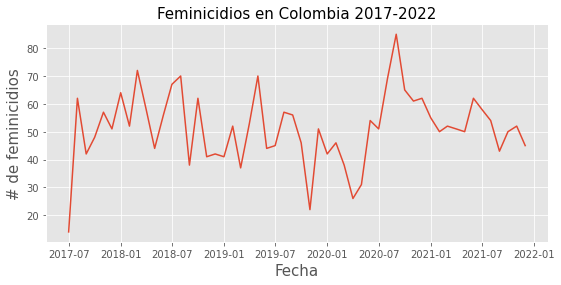

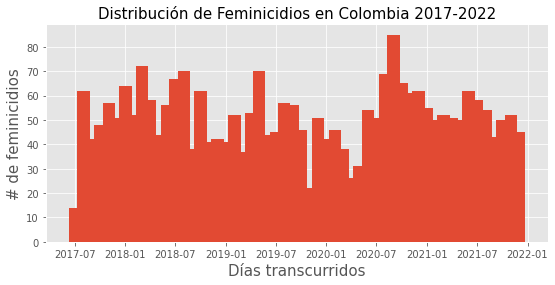

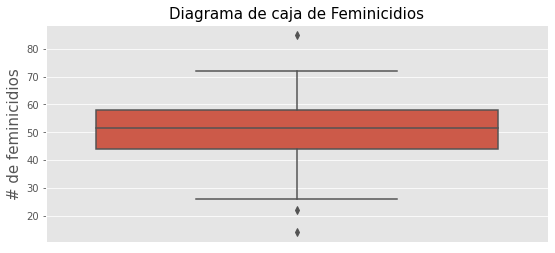

In [ ]:
# Lectura de datos y sus gráficas
# ==============================================================================

datos = pd.read_csv('feminicidios.csv',sep=';')
datos['fecha'] = pd.to_datetime(datos['fecha'])
plt.figure(figsize=(9,4)); plt.plot(datos['fecha'],datos['y'])
plt.xlabel('Fecha',size=15); plt.ylabel('# de feminicidios',size=15)
plt.title('Feminicidios en Colombia 2017-2022', size=15); plt.show()

plt.figure(figsize=(9,4)); H=plt.bar(datos['fecha'],datos['y'],width=45)
plt.xlabel('Días transcurridos',size=15); plt.ylabel('# de feminicidios',size=15)
plt.title('Distribución de Feminicidios en Colombia 2017-2022', size=15)
array=np.array([14. , 21.1, 28.2, 35.3, 42.4, 49.5, 56.6, 63.7, 70.8, 77.9, 85. ])
labels=[]
plt.xticks(); plt.show()

plt.figure(figsize=(9,4)); sns.boxplot(data=datos['y'],ax=None)
plt.title('Diagrama de caja de Feminicidios', size=15)
plt.ylabel('# de feminicidios',size=15); plt.xticks([]); plt.show()

Observamos que la mayor cantidad de feminicidios en Colombia fue a mediados del 2020; justo en época de pandemia, principal razón de este hecho. La menor cantidad a mitad del 2017, a finales del 2019 y principios del 2020.

Por otro lado; vemos que el promedio es de 52, aproximadamente, con datos atipicos en 20 y 80 feminicidios en ciertas fechas. Esta información la obtenemos gracias al diagrama de caja.

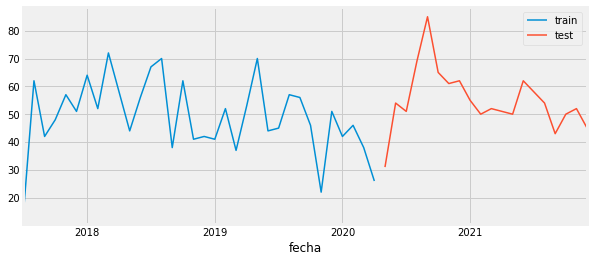

In [ ]:
steps = 20
datos_train = datos[:-steps]
datos_test  = datos[-steps:]

fig, ax = plt.subplots(figsize=(9, 4))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(datos['y'])
print(f"Variable Close: {shapiro_test}")

Variable Close: (0.9782916903495789, 0.43066704273223877)


El p-valor nos indica que no se puede asumir normalidad en nuestra variable de feminicidios con esta transformación.

## Tarea #2 Caminatas aleatorias

1. Una caminata aleatoria es una formalización matemática de la trayectoria que 
resulta de hacer sucesivos pasos aleatorios. Un ejemplo es estar en un pasillo donde cada 5 segundos se lanza una moneda, si sale cara se da el paso hacia adelante y si sale sello se da el paso hacia atrás. Esto representa una caminata aleatoria una ruta que es definida con ayuda de la posición en cierto instante que depende solo de su posición en algún instante previo y de  una serie de pasos aleatorios.




> Las caminatas pueden ser unidimensionales, de dos dimensiones o a varias dimensiones se logra al utilizar variables aleatorias que pertenecen a espacios vectoriales, para un ejemplo de caminata aleatoria en dos dimensiones volvemos a tomar el ejemplo anterior pero lanzando la moneda dos veces y dependiendo de la combinación avanzar a al frente, atrás, derecha o izquierda.


2.

Paquetes 

In [ ]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
import pylab 

En una dimensión, la trayectoria es simplemente todos los puntos entre la altura mínima y la altura máxima alcanzada por la caminata (ambos son, en promedio, del orden de N).

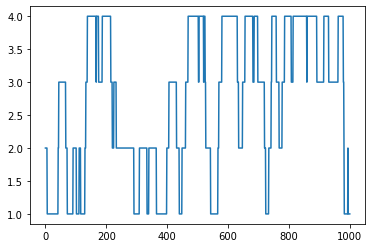

In [ ]:
prob = [0.05, 0.95]   
  
start = 2  
positions = [start] 
  
rr = np.random.random(1000) 
downp = rr < prob[0] 
upp = rr > prob[1] 
  
  
for idownp, iupp in zip(downp, upp): 
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 4
    positions.append(positions[-1] - down + up) 
  
plt.plot(positions) 
plt.show() 

3.


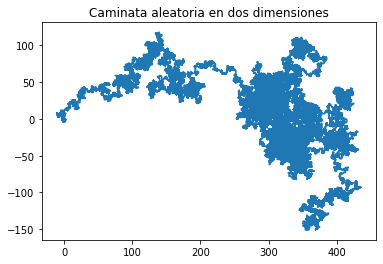

In [ ]:

  
n = 100000
  
x = np.zeros(n) 
y = np.zeros(n) 

for i in range(1, n): 
    val = random.randint(1, 4) 
    if val == 1: 
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1] 
    elif val == 2: 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif val == 3: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1
      

pylab.title("Caminata aleatoria en dos dimensiones") 
pylab.plot(x, y) 
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600) 
pylab.show() 

4. 

In [ ]:
num = 50
for x in range(num):

  prob = [0.05, 0.95]   
  start = 2  
  positions = [start] 
  rr = np.random.random(1000) 
  downp = rr < prob[0] 
  upp = rr > prob[1] 
  
  for idownp, iupp in zip(downp, upp): 
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 4
    positions.append(positions[-1] - down + up) 
  

  valores = []
  valores.append(positions)

In [ ]:
print(valores)

[[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1,

In [ ]:
import statistics
mean = statistics.mean(positions)
print(mean)

2


In [ ]:
import statistics
dev = statistics.stdev(positions)
print(dev)

1.0


5.

In [ ]:
num = 50
for x in range(num):
  n = 100000
  x = np.zeros(n) 
  y = np.zeros(n) 
  for i in range(1, n): 
    val = random.randint(1, 4) 
    if val == 1: 
      x[i] = x[i - 1] + 1
      y[i] = y[i - 1] 
    elif val == 2: 
      x[i] = x[i - 1] - 1
      y[i] = y[i - 1] 
    elif val == 3: 
      x[i] = x[i - 1] 
      y[i] = y[i - 1] + 1
    else: 
      x[i] = x[i - 1] 
      y[i] = y[i - 1] - 1
      
Listax = []
Listax.append(x)
Listay = []
Listay.append(y)


In [ ]:
print(Listax)

[array([   0.,    0.,    0., ..., -445., -446., -446.])]


In [ ]:
print(Listay)

[array([   0.,   -1.,    0., ..., -442., -442., -443.])]


## Marco teorico

1. Elabore un pequeño marco teórico sobre la temática de coeficientes de correlación lineal. Incluya al menos los tres estimadores que aparecen en el documento.


**CORRELACIÓN LINEAL:** Es un método estadístico que permite calcular la relación u asociación lineal que existen entre dos variables. para determinar o cálcular esta correlación hay varios tipos de coeficientes. Cabe destacar que la correlación no implica causalidad, y esta relación se puede deber a un tercer factor. 

**COVARIANZA:** Mide el grado de variación conjunta de dos variables. Este puede tomar valores negativos o positivos, si son positivos los valores cambian en la misma dirección, y si son negativos cambian en direcciones opuestas. su calculo es mediante la siguiente expredión:

<center>$COV(X,Y)=\frac{ {\LARGE \sum_{i=1}^n (x_i- \bar{x})(y_i- \bar{y})}}{N-1}$</center>

donde $\bar{x}$ y $\bar{y}$ son la media.

**COEFICIENTE DE CORRELACIÓN LINEAL:** son estadísticos que cálculan la asociación lineal entre las dos variables, existen varios tipos y su rango esta comprendido entre $[-1,1]$. Donde 0 indica nula asociación, y esta asociación va aumentando a medida que el coeficiente se aproxime a $\pm 1$.

**SIGNIFICANCIA ESTADÍSTICA:** Aunque los valores del coeficiente sean muy cercanos a  $\pm 1$, es neceario determinar su significancia, ya que el valor calculado podria deberse a la aleatoriedad. 

Para determinar lo anterior se hacer por medio del test paramétrico de sifgnificacncia estadística el cual es el t-est. donde el estadístico t se cálcula mediante la siguiente expresión:

<center>$t = {\LARGE \frac{r\sqrt{N-2}}{\sqrt{1-r^2}}}$</center>

donde $r$ es el valor del coeficiente de correlación y $N$ es el número de observaciones disponibles

**COEFICIENTE DE PEARSON:** se cálcula normalizando la covarianza entre las variables de la siguiente manera:

<center>$p={\LARGE\frac{COV(X,Y)}{\sigma_x \sigma_y}}$</center>

pero debido a que generalmente no se tiene los datos de toda la población, es necesario realizar la estimación con la muestra mediante el coeficiente de Pearson muestral $r$:

<center>$r_{xy}=\frac{ {\LARGE \sum_{i=1}^n (x_i- \bar{x})(y_i- \bar{y})}}{{\LARGE \sqrt{\sum_{i=1}^n (x_i- \bar{x})^2 \sum_{i=1}^n(y_i- \bar{y})^2}}}$</center>

para aplicar este coeficiente debe tener ciertas condiciones:



* La relación tiene que ser de tipo lineal (de lo contrario, el coeficiente de Pearson no la puede detectar).

* Las dos variables deben de ser numéricas.

* ambas variables se tienen que distribuir de forma normal.

* la varianza de  Y  debe ser constante a lo largo de la variable  X.


**COEFICIENTE DE SPEARMAN:** se utiliza como alternativa no paramétrica cuando los datos son ordinales, o cuando los datos no satisfacen la condición de normalidad.

<center>${\LARGE r_s=1-\frac{6\sum d_i^2}{n(n^2-1)}}$</center>


Siendo $d_i$ la distancia entre los rangos de cada observación $(x_i-y_i)$ y $n$ el número de observaciones.

para aplicar este coeficiente es necesario que el coeficiente entre las variables sea monótona (constante).

**CORRELACIÓN PARCIAL:** La correlación estudia la relación (lineal o monotónica) existente entre dos variables. Puede ocurrir que, la relación que muestran dos variables, se deba a una tercera variable que influye sobre las otras dos. A este fenómeno se le conoce como **confounding**. La correlación parcial permite estudiar la relación lineal entre dos variables bloqueando el efecto de una tercera (o más) variables. Si el valor de correlación de dos variables es distinto al valor de correlación parcial de esas mismas dos variables, cuando se controla una tercera, significa que la tercera variable influye en las otras dos.


# Taller 5

In [ ]:
# Paquetes !
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr
import warnings
import csv
import random
from rpy2.robjects import r
import seaborn as sbn
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

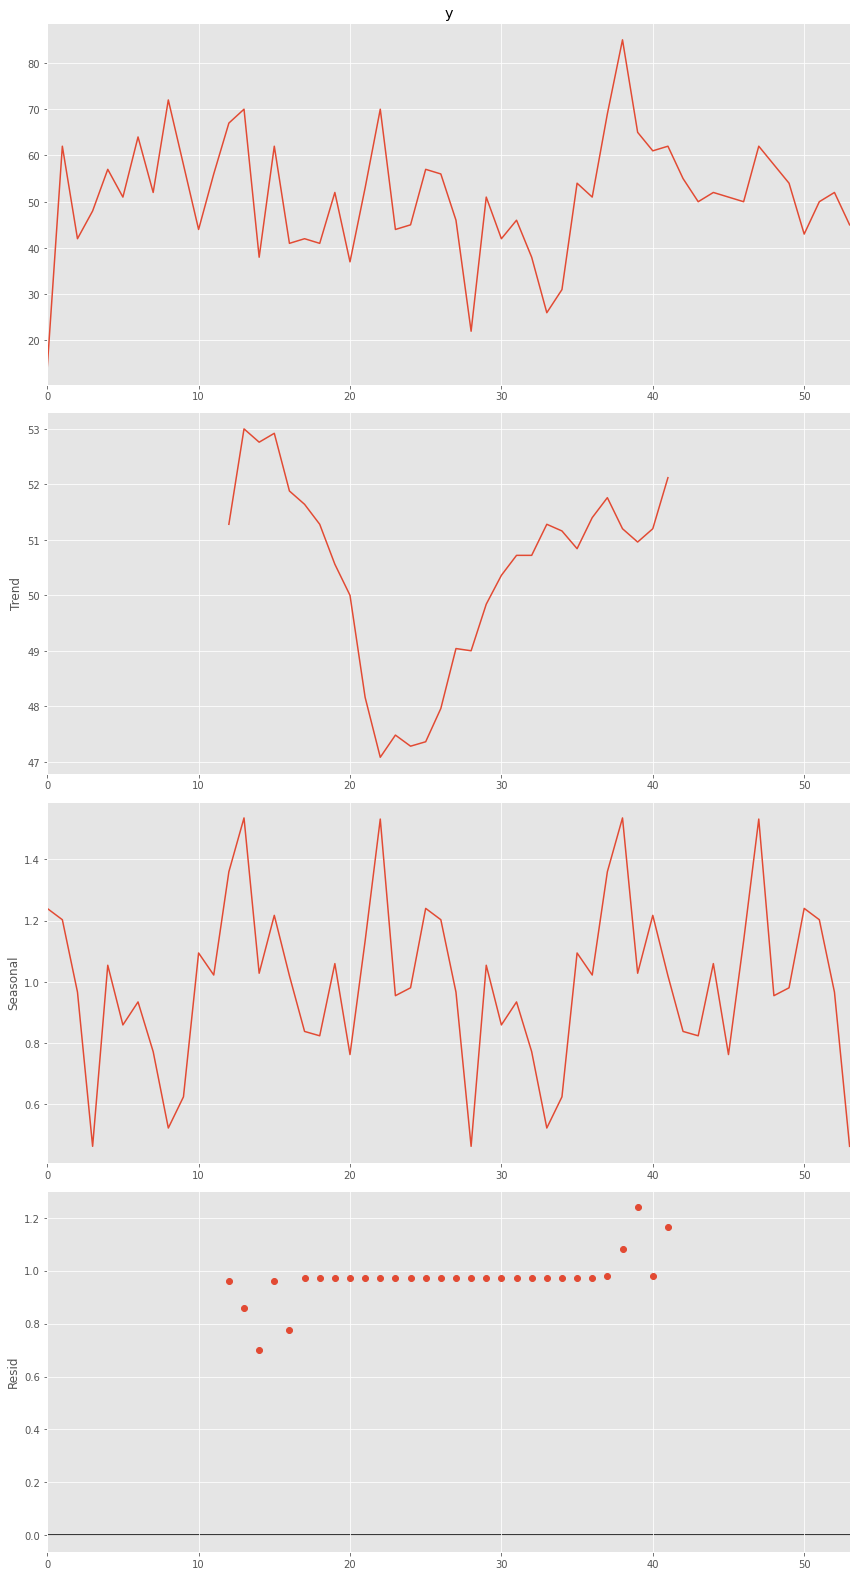

In [ ]:
datos = pd.read_csv('feminicidios.csv',sep=';')
decomposition = seasonal_decompose(datos['y'], model='multiplicative', period=25)
rcParams['figure.figsize'] = 12,22 
fig = decomposition.plot(); plt.show() 

Realizamos ahora la autocorrelación y la autocorrelación parcial.

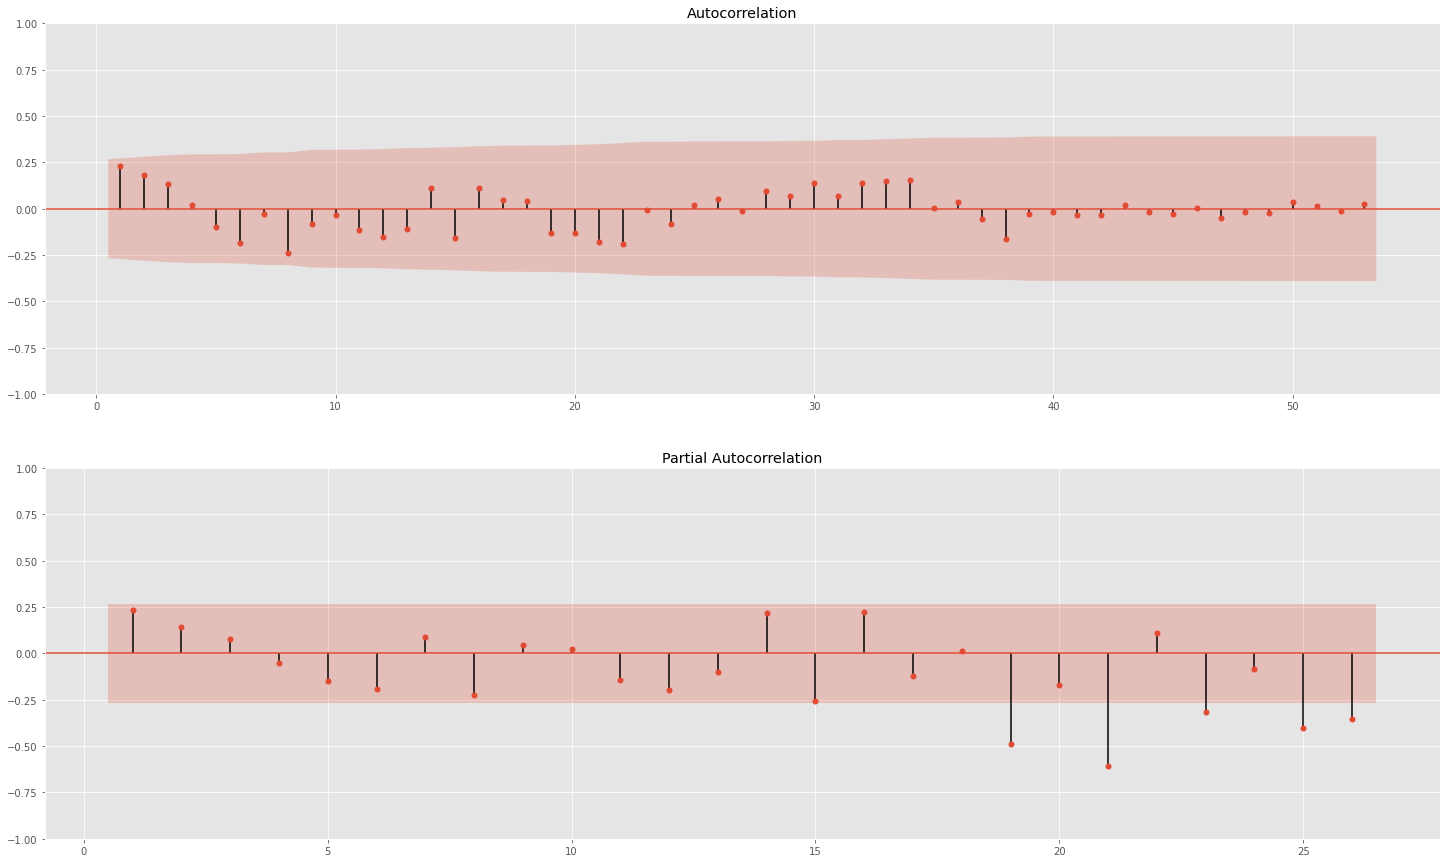

In [ ]:
plt.figure(figsize=(25,15)); plt.subplot(211)
plot_acf(datos['y'], ax=plt.gca(), lags=range(1,datos.shape[0]), alpha=0.05) # Autocorrelación.
plt.subplot(212)
plot_pacf(datos['y'], ax=plt.gca(), lags=range(1,datos.shape[0]//2), alpha=0.05) # Autocorrelación Parcial.
plt.show()

El área sombrada de rojo representa el intervalo de confianza que está dado por $\alpha(1-i)$ donde $i=int_{confianza}$. Si $\alpha=0.05$, el intervalo de confianza es del 95%. Por otro lado, las líneas verticales representan los valores de correlación por cada número de retrasos.

Vemos también que como los datos están por fuera del intervalo de confianza; entonces, realizaremos un tratamiento de los datos con el fin de que la serie sea estacionaria antes de realizar la predicción.

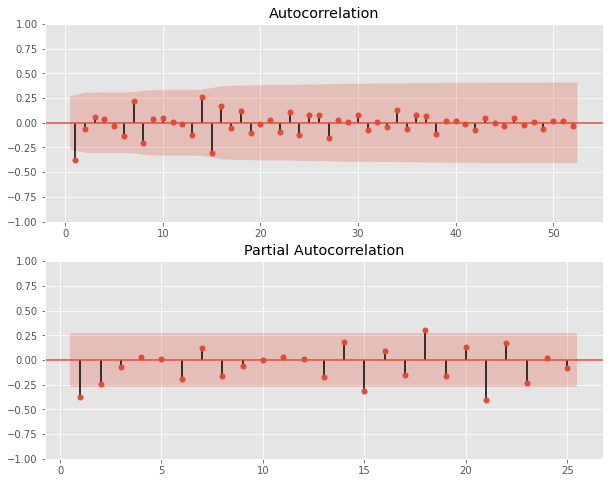

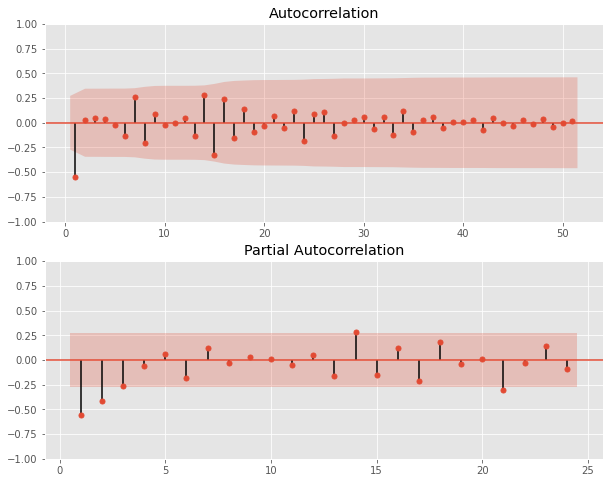

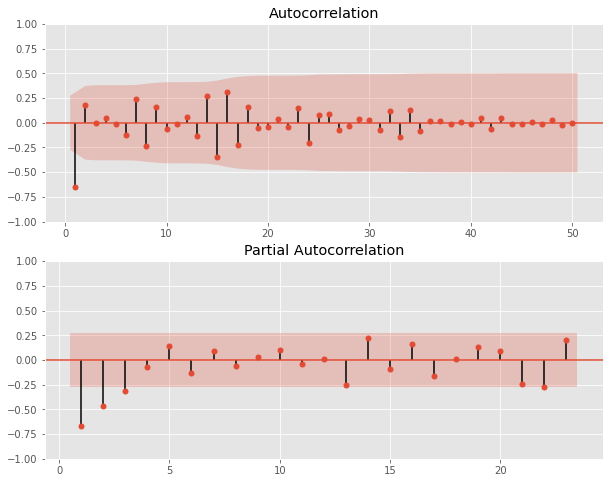

In [ ]:
d=1; d1 = np.diff(datos['y']); plt.figure(figsize=(10,8)); plt.subplot(211)
plot_acf(d1, ax=plt.gca(), lags=range(1,datos.shape[0]-d), alpha=0.05); plt.subplot(212)
plot_pacf(d1, ax=plt.gca(), lags=range(1,datos.shape[0]//2-d), alpha=0.05); plt.show()

d=2; d2 = np.diff(d1); plt.figure(figsize=(10,8)); plt.subplot(211)
plot_acf(d2, ax=plt.gca(), lags=range(1,datos.shape[0]-d), alpha=0.05); plt.subplot(212)
plot_pacf(d2, ax=plt.gca(), lags=range(1,datos.shape[0]//2-d), alpha=0.05); plt.show()

d=3; d3 = np.diff(d2); plt.figure(figsize=(10,8)); plt.subplot(211)
plot_acf(d3, ax=plt.gca(), lags=range(1,datos.shape[0]-d), alpha=0.05); plt.subplot(212)
plot_pacf(d3, ax=plt.gca(), lags=range(1,datos.shape[0]//2-d), alpha=0.05); plt.show()

Debido a lo que se observa en las primeras tres diferencias, solo se necesita hacer la primera diferencia ya que la mayoría de los datos se encuentran dentro de los intervalos de confianza como se ve en el gráfico de autocorrelación y en el gráfico de autocorrelación.

La predicción $AR(p)$ se realiza para $p = 0.1,2,3$. Imaginamos las posibles diferencias en este pronóstico si cambiamos el valor de $p$. Cabe señalar que de acuerdo con los gráficos de correlación presentados en el punto 2, el mejor valor para p sería 1.

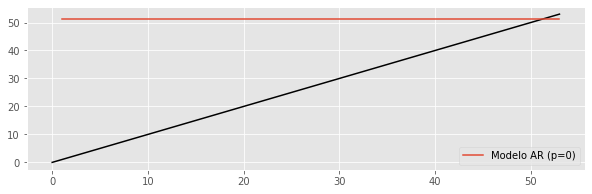

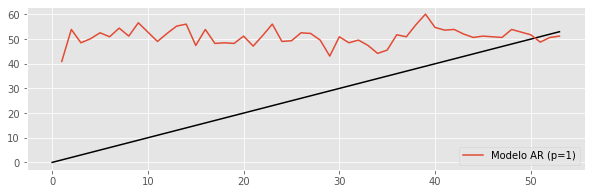

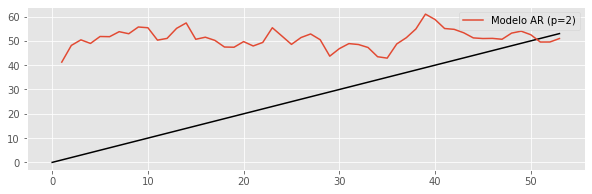

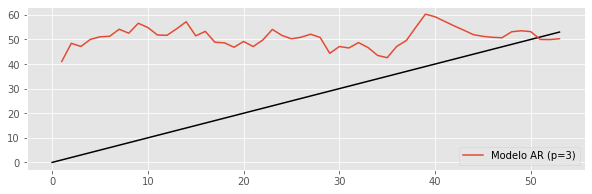

In [ ]:
arr_dias=np.arange(datos.shape[0]); predi=pd.DataFrame()

for i in range(4):
    model = sm.tsa.arima.ARIMA(datos['y'], order=(i,0,0)).fit()
    predi['Predicción AR(%i)' %(i)] = model.predict(start=1, end=datos.shape[0]-1)
    plt.figure(figsize=(10,3)); plt.plot(arr_dias, 'k-')
    plt.plot(predi.iloc[:,[i]], label="Modelo AR (p={})".format(i))
    plt.legend(); plt.show()

Para determinar si la predicción $AR(p)$ es buena, se calcula el error relativo entre el valor real y el valor predicho para diferentes valores p. Muestre un resumen de estos errores en el conjunto de datos. 

In [ ]:
tem=datos; comparacion = pd.concat([tem['y'], predi], axis=1); print('Predicción AR(1):','\n')
display((np.abs(comparacion['y'][1:]-comparacion['Predicción AR(1)'][1:])/comparacion['y'][1:]*100).describe()); print('\n','Predicción AR(2):','\n')
display((np.abs(comparacion['y'][1:]-comparacion['Predicción AR(2)'][1:])/comparacion['y'][1:]*100).describe()); print('\n','Predicción AR(3):','\n')
display((np.abs(comparacion['y'][1:]-comparacion['Predicción AR(3)'][1:])/comparacion['y'][1:]*100).describe())

Predicción AR(1): 



count     53.000000
mean      19.029646
std       21.087963
min        0.426752
25%        5.470567
50%       13.816986
75%       26.163007
max      125.440608
dtype: float64


 Predicción AR(2): 



count     53.000000
mean      18.706167
std       21.326813
min        0.005886
25%        6.143193
50%       14.599235
75%       25.635408
max      129.429583
dtype: float64


 Predicción AR(3): 



count     53.000000
mean      18.382930
std       21.554858
min        0.005741
25%        7.235512
50%       13.030395
75%       23.670418
max      130.926245
dtype: float64

Resumiendo, como se puede ver en el error relativo total (en porcentaje), el pronóstico usando el tipo $AR(p)$ parece ser apropiado, especialmente para valores de $p = 3$ y $p = 2$, teniendo la media del segundo valor y la media de los errores menores.